In [67]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_float, img_as_ubyte, io
from skimage.filters import rank
from skimage.morphology import disk, ball

In [3]:
def readImg(filename):
    img = img_as_float(io.imread(filename))
    return img

In [11]:
img = readImg("Exp103_mCh-wGBD_IT-PAGFP-Cdc42_RhoGDI_cellH-001.tif")

In [12]:
img.shape

(659, 2, 512, 512)

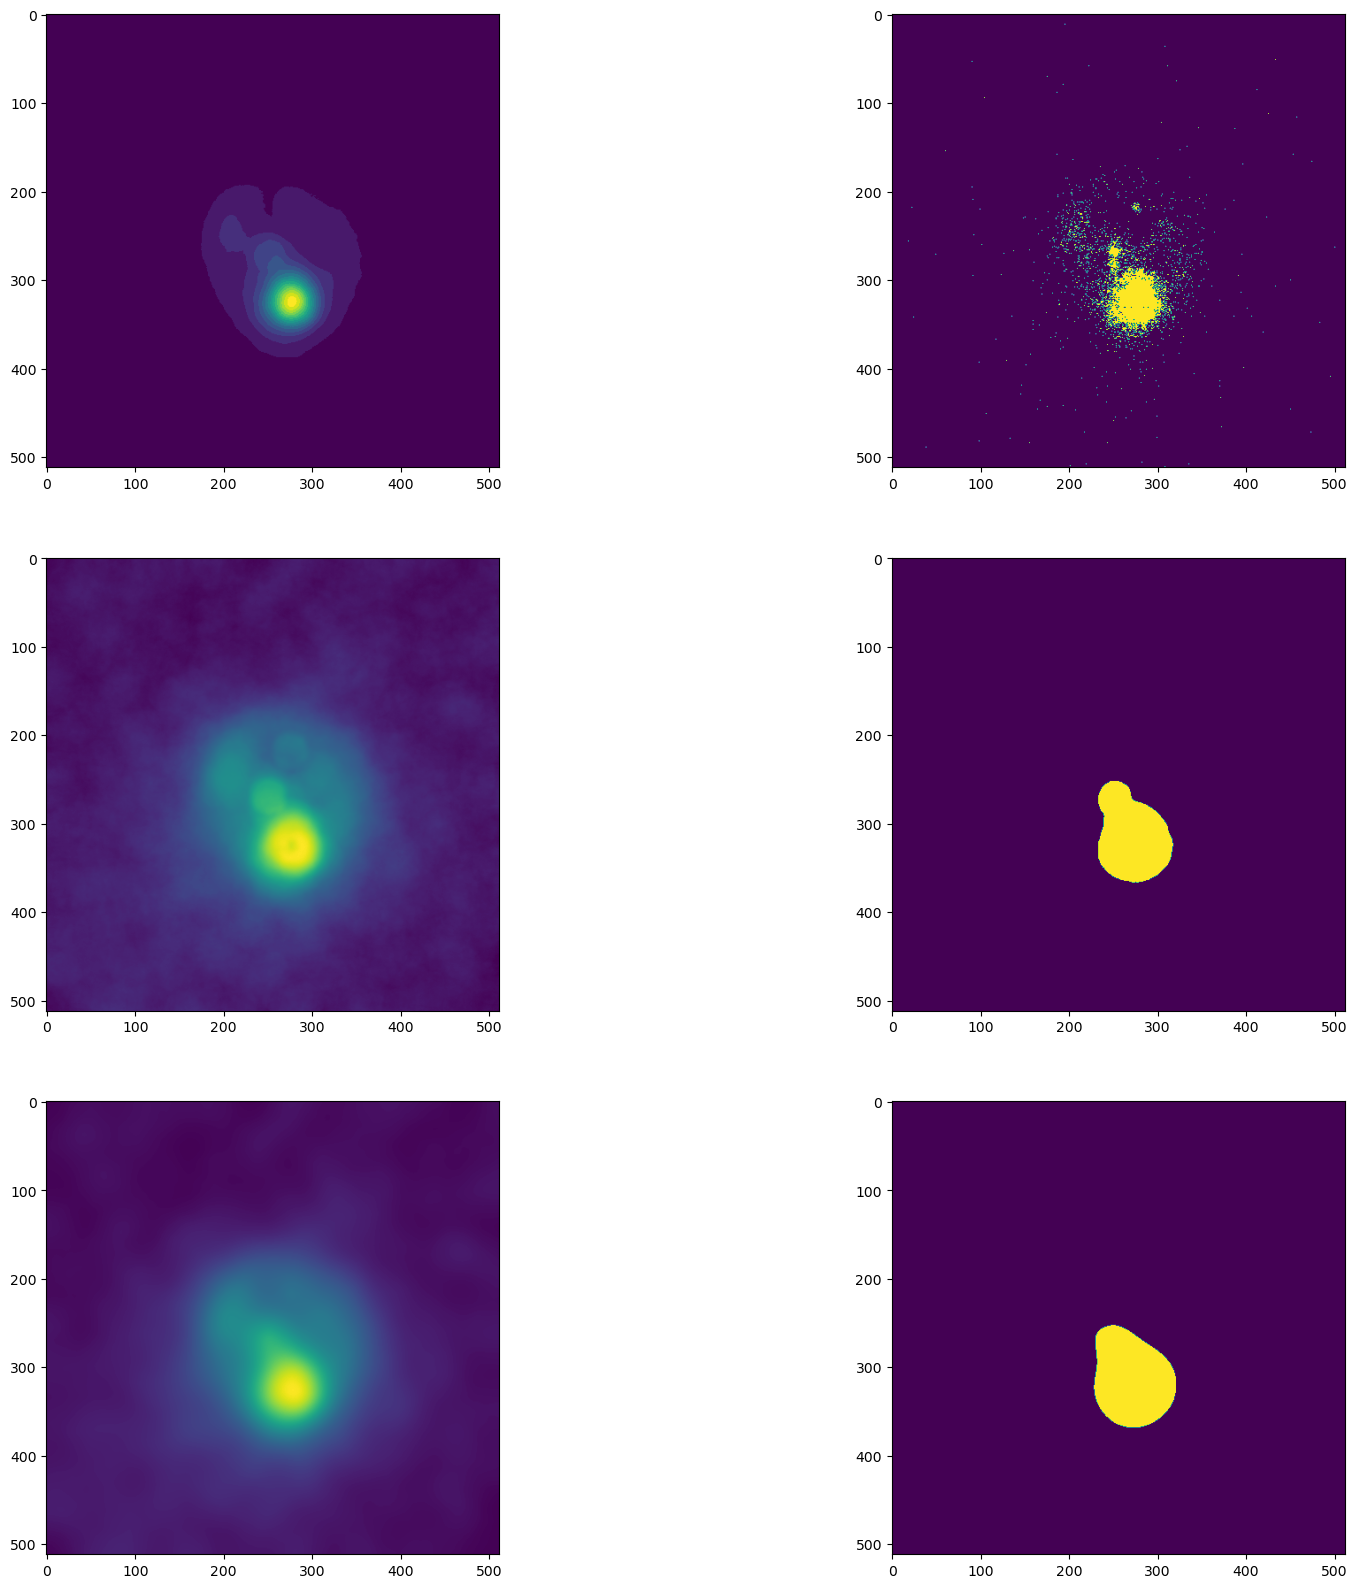

In [228]:
frame = 464
disk_size = 20

fig = plt.figure(figsize=(20,20))
fig.add_subplot(3, 2, 1)
plt.imshow(rank.mean_percentile(img[frame, 1, :, :], footprint=disk(20), p0=0.0, p1=1))
fig.add_subplot(3, 2, 2)
plt.imshow(img[frame, 1, :, :]>0.02)
fig.add_subplot(3, 2, 3)
plt.imshow(rank.entropy(img[frame, 1, :, :], footprint=disk(disk_size)))
fig.add_subplot(3, 2, 4)
plt.imshow(rank.entropy(img[frame, 1, :, :], footprint=disk(disk_size))>3.0)
fig.add_subplot(3, 2, 5)
plt.imshow(rank.geometric_mean(rank.entropy(img[frame, 1, :, :], footprint=disk(20))/rank.entropy(img[frame, 1, :, :], footprint=disk(20)).max(), footprint=disk(20)))
fig.add_subplot(3, 2, 6)
plt.imshow(rank.geometric_mean(rank.entropy(img[frame, 1, :, :], footprint=disk(20))/rank.entropy(img[frame, 1, :, :], footprint=disk(20)).max(), footprint=disk(20))>150)
plt.show()

In [149]:
img_rank_mean = np.array([rank.mean_percentile(im, footprint=disk(20), p0=0.25, p1=1.0) for im in img[:, 1, :, :]])

/var/folders/g5/c1xn4py12334l0hr0gtnhk5r0000gn/T/ipykernel_89219/2800081462.py:1: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  img_rank_mean = np.array([rank.mean_percentile(im, footprint=disk(20), p0=0.25, p1=1.0) for im in img[:, 1, :, :]])


In [150]:
img_rank_entropy = np.array([rank.entropy(im, footprint=disk(20)) for im in img[:, 1, :, :]])

/var/folders/g5/c1xn4py12334l0hr0gtnhk5r0000gn/T/ipykernel_89219/403204419.py:1: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  img_rank_entropy = np.array([rank.entropy(im, footprint=disk(20)) for im in img[:, 1, :, :]])


In [168]:
img_rank_entropy_t3 = img_rank_entropy > 2.75

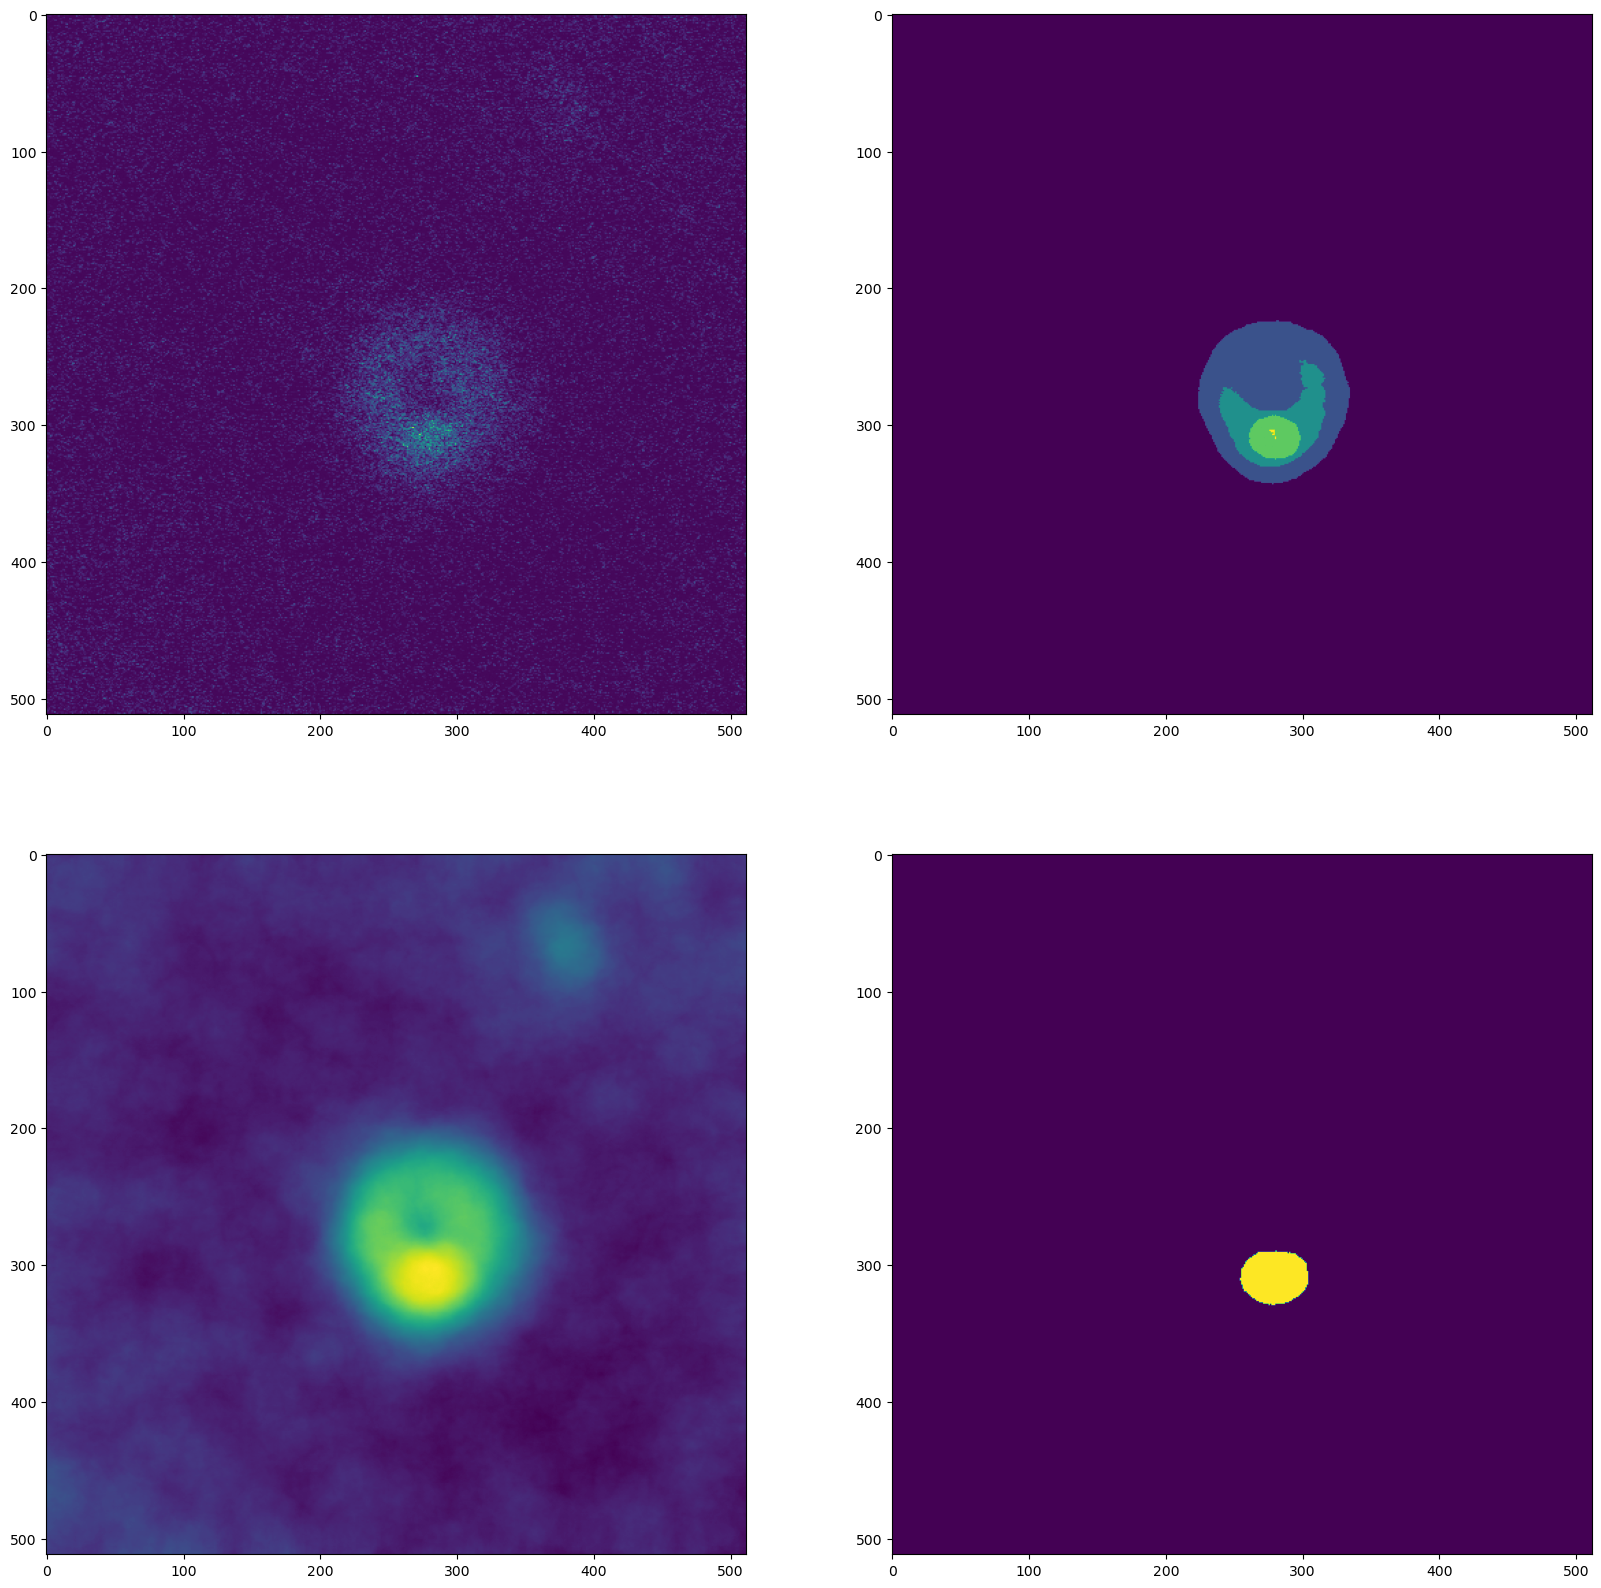

In [198]:
frame = 625

fig = plt.figure(figsize=(20,20))
fig.add_subplot(2, 2, 1)
plt.imshow(img[frame, 1, :, :])
fig.add_subplot(2, 2, 2)
plt.imshow(img_rank_mean[frame, :, :])
fig.add_subplot(2, 2, 3)
plt.imshow(img_rank_entropy[frame, :, :])
fig.add_subplot(2, 2, 4)
plt.imshow(img_rank_entropy_t3[frame, :, :])

In [155]:
io.imsave("rank_mean_contour.tif", img_rank_mean)

/var/folders/g5/c1xn4py12334l0hr0gtnhk5r0000gn/T/ipykernel_89219/2508412632.py:1: UserWarning: rank_mean_contour.tif is a low contrast image
  io.imsave("rank_mean_contour.tif", img_rank_mean)


In [156]:
io.imsave("rank_entropy_contour.tif", img_rank_entropy)

In [157]:
io.imsave("rank_entropy_t3_contour.tif", img_rank_entropy_t3)

/var/folders/g5/c1xn4py12334l0hr0gtnhk5r0000gn/T/ipykernel_89219/3260025588.py:1: UserWarning: rank_entropy_t3_contour.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave("rank_entropy_t3_contour.tif", img_rank_entropy_t3)
/var/folders/g5/c1xn4py12334l0hr0gtnhk5r0000gn/T/ipykernel_89219/3260025588.py:1: UserWarning: rank_entropy_t3_contour.tif is a low contrast image
  io.imsave("rank_entropy_t3_contour.tif", img_rank_entropy_t3)


In [197]:
np.unique(img_rank_mean)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18], dtype=uint8)

In [224]:
img_rank_mean_p0_p1 = np.array([rank.mean_percentile(im, footprint=disk(20), p0=0.00, p1=1.0) for im in img[:, 1, :, :]])

/var/folders/g5/c1xn4py12334l0hr0gtnhk5r0000gn/T/ipykernel_89219/438342343.py:1: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  img_rank_mean_p0_p1 = np.array([rank.mean_percentile(im, footprint=disk(20), p0=0.00, p1=1.0) for im in img[:, 1, :, :]])


In [225]:
io.imsave("rank_mean_contour-p0.00_p1.00.tif", img_rank_mean_p0_p1)

/var/folders/g5/c1xn4py12334l0hr0gtnhk5r0000gn/T/ipykernel_89219/332968679.py:1: UserWarning: rank_mean_contour-p0.00_p1.00.tif is a low contrast image
  io.imsave("rank_mean_contour-p0.00_p1.00.tif", img_rank_mean_p0_p1)


In [226]:
np.unique(img_rank_mean_p0_p1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=uint8)

/Users/roy/mambaforge/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3526: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


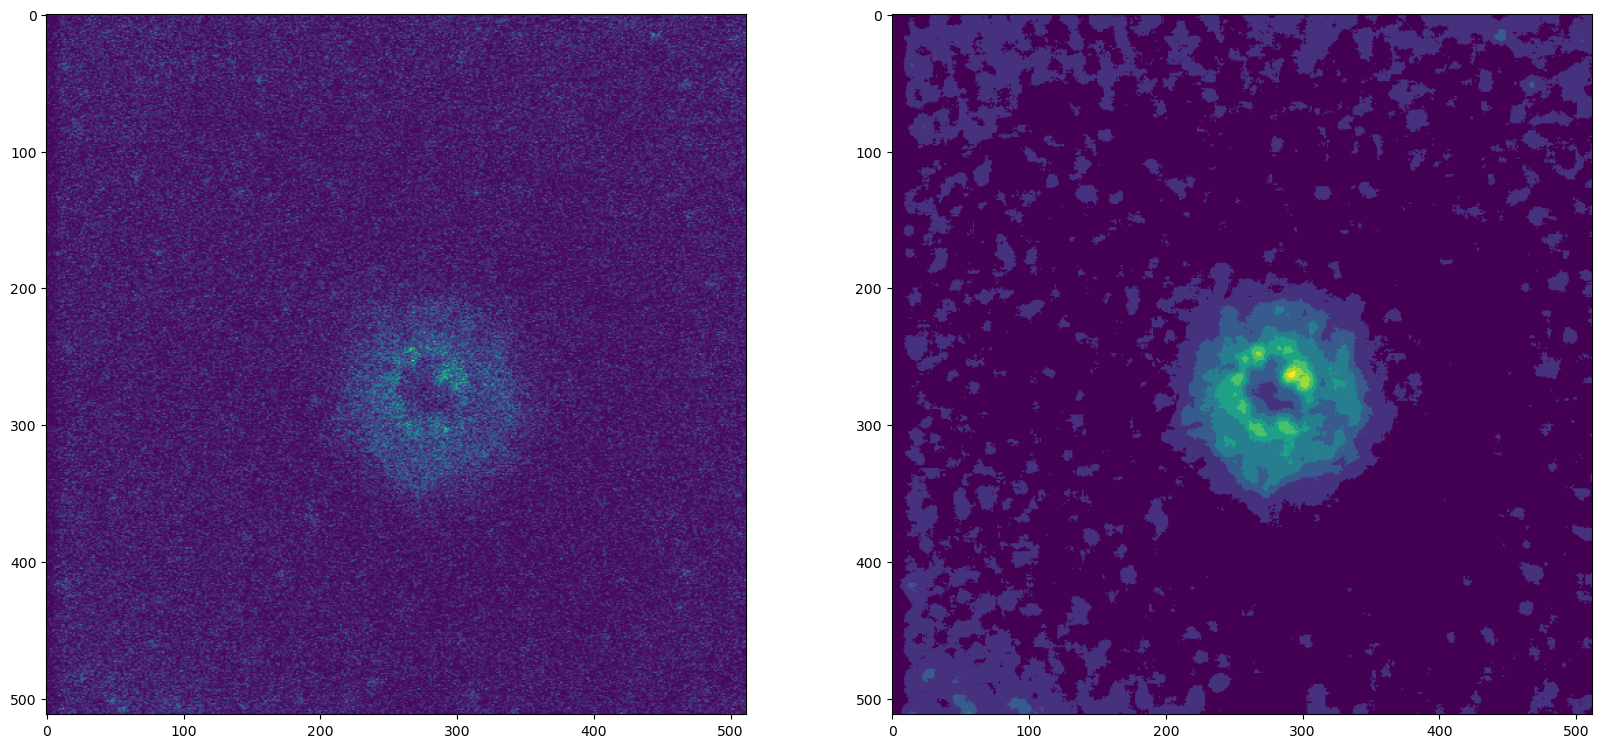

In [248]:
frame = 625

fig = plt.figure(figsize=(20,20))
fig.add_subplot(2, 2, 1)
plt.imshow(img[frame, 0, :, :])
fig.add_subplot(2, 2, 2)
plt.imshow(rank.mean(img[frame, 0, :, :], footprint=disk(5)))
plt.show()

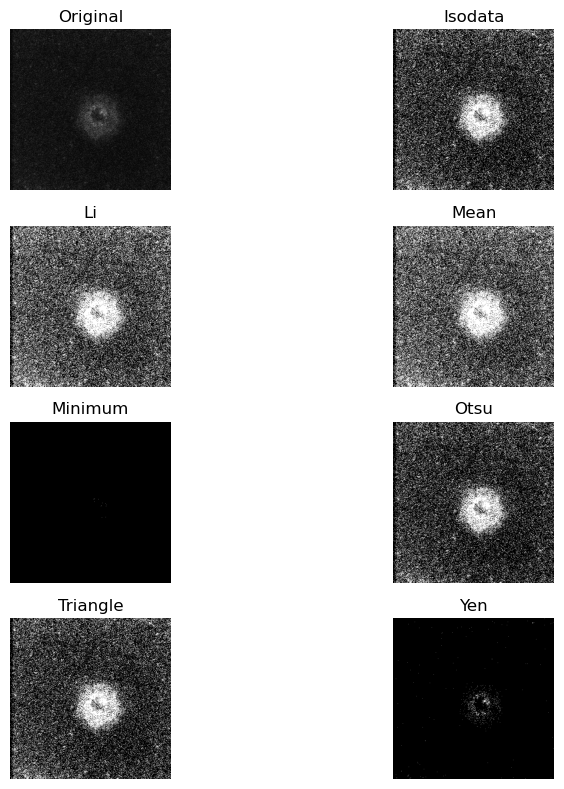

In [251]:
from skimage.filters import try_all_threshold
fig, ax = try_all_threshold(img[frame, 0, :, :], figsize=(10, 8), verbose=False)